In [2]:
#import des bibliothèques
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np

In [ ]:
url='https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-Creta_Maris_Beach_Resort-Hersonissos_Crete.html'
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
r=requests.get(url,headers=headers)
soup = BeautifulSoup(r.content,'html.parser')

In [4]:
links= soup.findAll('a',{'class':'pageNum cx_brand_refresh_phase2'})

In [5]:
links

[<a class="pageNum cx_brand_refresh_phase2" href="/Hotel_Review-g503710-d248492-Reviews-or5-Creta_Maris_Beach_Resort-Hersonissos_Crete.html">2</a>,
 <a class="pageNum cx_brand_refresh_phase2" href="/Hotel_Review-g503710-d248492-Reviews-or10-Creta_Maris_Beach_Resort-Hersonissos_Crete.html">3</a>,
 <a class="pageNum cx_brand_refresh_phase2" href="/Hotel_Review-g503710-d248492-Reviews-or15-Creta_Maris_Beach_Resort-Hersonissos_Crete.html">4</a>,
 <a class="pageNum cx_brand_refresh_phase2" href="/Hotel_Review-g503710-d248492-Reviews-or20-Creta_Maris_Beach_Resort-Hersonissos_Crete.html">5</a>,
 <a class="pageNum cx_brand_refresh_phase2" href="/Hotel_Review-g503710-d248492-Reviews-or25-Creta_Maris_Beach_Resort-Hersonissos_Crete.html">6</a>,
 <a class="pageNum cx_brand_refresh_phase2" href="/Hotel_Review-g503710-d248492-Reviews-or2180-Creta_Maris_Beach_Resort-Hersonissos_Crete.html">437</a>]

In [6]:
list_links=[link['href'] for link in links]
liens =["https://www.tripadvisor.com"+ list_link for list_link in list_links]

In [7]:
liens

['https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-or5-Creta_Maris_Beach_Resort-Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-or10-Creta_Maris_Beach_Resort-Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-or15-Creta_Maris_Beach_Resort-Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-or20-Creta_Maris_Beach_Resort-Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-or25-Creta_Maris_Beach_Resort-Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-or2180-Creta_Maris_Beach_Resort-Hersonissos_Crete.html']

In [27]:
for i in range(0, 2175, 5):
    u = 'https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or{}-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/'.format(i)    
    print(u)

https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or0-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/
https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or5-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/
https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or10-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/
https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or15-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/
https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or20-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/
https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or25-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/
https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or30-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/
https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or35-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/
https://www.tripadvisor.com/Hotel_Review-g503710-d248492-R

In [ ]:
def get_notes(bubble):
    bubble_string = bubble.span['class'][1]
    dict_bubles = {'bubble_50':5;'bubble_40':4;'bubble_45':4.5;'bubble_30':3;
                   'bubble_35':3.5;'bubble_20':2;'bubble_25':2.5;
                   'bubble_15':1.5;'bubble_10':1}
    return(dict_bubles[bubble_string])

In [87]:
title = []
reviews=[]
u_a=[]
dates=[]
notes=[]

for i in range(0, 2175, 5):
    act = requests.get('https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or{}-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/'.format(i)) 
    soup = BeautifulSoup(act.content, 'lxml')
    
    title_rev= soup.find_all('a','ocfR3SKN')
    t_r=[title_re.text for title_re in title_rev]
    title.extend(t_r)
                  
    review_act= soup.find_all('q','IRsGHoPm')
    com =[review_ac.text for review_ac in review_act]
    reviews.extend(com) 
    
    #uls= soup.find_all('a',{'class':'pageNum cx_brand_refresh_phase2'})
    #u = [ul['href'] for ul in uls]
    #u_a.append(u)
    
    l_a= soup.find_all('div','_2fxQ4TOx')
    li=[l.text for l in l_a]
    dates.extend(li)
    
    bubles= soup.find_all('div','nf9vGX55')
    bu = [buble.split() for buble in bubles]
    notes.extend(bu)
      
    bubles= soup.find_all('span',{'class': re.compile('ui_bubble_rating bubble_\d*')})
    bu = [int(buble['class'][1].strip('bubble_'))/10 for buble in bubles]
    notes.extend(bu)

In [4]:
act = requests.get('https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Review-or25-Creta_Maris_Beach_Resort-Hersonissos_Crete.html/') 
soup = BeautifulSoup(act.content, 'lxml')

In [5]:
soup

<!DOCTYPE html>
<html lang="en" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><link href="https://static.tacdn.com/favicon.ico?v2" id="favicon" rel="icon" type="image/x-icon"/><link color="#000000" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" rel="mask-icon" sizes="any"/><meta content="#34e0a1" name="theme-color"/><meta content="telephone=no" name="format-detection"/><script type="text/javascript">window.taRollupsAreAsync = true;</script><link crossorigin="" href="https://static.tacdn.com/css2/webfonts/TripSans/TripSans.css?v1.002" rel="stylesheet"/><title>CRETA MARIS BEACH RESORT $168 ($̶2̶1̶6̶) - Updated 2020 Prices &amp;  Hotel Reviews - Hersonissos, Greece - Tripadvisor</title><meta content="Now $168 (Was $̶2̶1̶6̶) on Tripadvisor: Creta Maris Beach Resort, Hersonissos. See 4,770 traveler reviews, 4,945 candid photos, and great deals for Creta Maris Beach Resort, ranked 

In [8]:
title_rev= soup.find_all('a','ocfR3SKN')
t_r=[title_re.text for title_re in title_rev]

review_act= soup.find_all('q','IRsGHoPm')
com =[review_ac.text for review_ac in review_act]

#uls= soup.find_all('a',{'class':'pageNum cx_brand_refresh_phase2'})
#u = [ul['href'] for ul in uls]
#u_a.append(u)

l_a= soup.find_all('div','_2fxQ4TOx')
li=[l.text for l in l_a]

bubles= soup.find_all('div','nf9vGX55')

#bubles= soup.find_all('span',{'class': re.compile('ui_bubble_rating bubble_\d*')})
#bu = [int(buble['class'][1].strip('bubble_'))/10 for buble in bubles]
#notes.extend(bu)

In [74]:
len(title)

2175

In [75]:
len(reviews)

2175

In [88]:
len(notes)

8233

In [77]:
len(dates)

2175

# Dataframe : cleaning 

In [167]:
import pandas as pd
import numpy as np

df = pd.DataFrame(list(zip(title,notes,reviews,dates)),
              columns=['title','notes','reviews','dates'])

In [168]:
df.head(10)

,title,notes,reviews,dates
0,Not for couples,4.5,last day of a 6 day holiday. After having 5 ho...,Swarren86 wrote a review Aug 2020
1,Jolleyhols,4.5,From start to finish a lovely holiday.We had a...,frank j wrote a review Aug 2020
2,Spa,4.5,The Spa is perfect The massage is very nice y...,Mohammed O wrote a review Aug 2020
3,Fantastic holiday,4.5,Highly recommend Creta Maris. Rooms very comfo...,Heather wrote a review Aug 2020
4,"Outstanding With excellent service, v nice roo...",4.5,We visited for a week towards end of August fr...,Amlan R wrote a review Aug 2020
5,excellent covid free holidays,4.5,"the hotel looks like a small village,everythin...",stefandfg wrote a review Aug 2020
6,Amazing holiday,4.5,I really enjoyed my time in the resort food wa...,TanjaF wrote a review Aug 2020
7,Holiday 2020,4.5,For the fourth year in a row we are enjoying a...,Sigi wrote a review Aug 2020
8,Hammam Spa,4.5,Aegeo spas Julia gave an excellent massage t...,V B wrote a review Aug 2020
9,A place in paradise,5.0,"Superb hotel, so picturesque, We had the warme...",Arpita B wrote a review Aug 2020


In [169]:
df1= df['dates'].str.partition('review')[[0, 2]]

In [170]:
df1.head()

,0,2
0,Swarren86 wrote a,Aug 2020
1,frank j wrote a,Aug 2020
2,Mohammed O wrote a,Aug 2020
3,Heather wrote a,Aug 2020
4,Amlan R wrote a,Aug 2020


In [171]:
df['dates']=df1[2]

In [172]:
df.head()

,title,notes,reviews,dates
0,Not for couples,4.5,last day of a 6 day holiday. After having 5 ho...,Aug 2020
1,Jolleyhols,4.5,From start to finish a lovely holiday.We had a...,Aug 2020
2,Spa,4.5,The Spa is perfect The massage is very nice y...,Aug 2020
3,Fantastic holiday,4.5,Highly recommend Creta Maris. Rooms very comfo...,Aug 2020
4,"Outstanding With excellent service, v nice roo...",4.5,We visited for a week towards end of August fr...,Aug 2020


In [173]:
df.loc[0:48,'dates'] = 'Aug 2020'

In [174]:
df.head(50)

,title,notes,reviews,dates
0,Not for couples,4.5,last day of a 6 day holiday. After having 5 ho...,Aug 2020
1,Jolleyhols,4.5,From start to finish a lovely holiday.We had a...,Aug 2020
2,Spa,4.5,The Spa is perfect The massage is very nice y...,Aug 2020
3,Fantastic holiday,4.5,Highly recommend Creta Maris. Rooms very comfo...,Aug 2020
4,"Outstanding With excellent service, v nice roo...",4.5,We visited for a week towards end of August fr...,Aug 2020
5,excellent covid free holidays,4.5,"the hotel looks like a small village,everythin...",Aug 2020
6,Amazing holiday,4.5,I really enjoyed my time in the resort food wa...,Aug 2020
7,Holiday 2020,4.5,For the fourth year in a row we are enjoying a...,Aug 2020
8,Hammam Spa,4.5,Aegeo spas Julia gave an excellent massage t...,Aug 2020
9,A place in paradise,5.0,"Superb hotel, so picturesque, We had the warme...",Aug 2020


In [175]:
df2= df1[0].str.partition('wrote a')[[0, 2]]

In [176]:
df2.head()

,0,2
0,Swarren86,
1,frank j,
2,Mohammed O,
3,Heather,
4,Amlan R,


In [177]:
df['names']=df2[0]

In [178]:
df.head()

,title,notes,reviews,dates,names
0,Not for couples,4.5,last day of a 6 day holiday. After having 5 ho...,Aug 2020,Swarren86
1,Jolleyhols,4.5,From start to finish a lovely holiday.We had a...,Aug 2020,frank j
2,Spa,4.5,The Spa is perfect The massage is very nice y...,Aug 2020,Mohammed O
3,Fantastic holiday,4.5,Highly recommend Creta Maris. Rooms very comfo...,Aug 2020,Heather
4,"Outstanding With excellent service, v nice roo...",4.5,We visited for a week towards end of August fr...,Aug 2020,Amlan R


In [179]:
df = df[df['notes'] != '3']

C:\Users\lina.saidane\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [180]:
df['full_content'] = df['title'] + '. ' + df['reviews']

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2170 non-null   object 
 1   notes         2170 non-null   float64
 2   reviews       2170 non-null   object 
 3   dates         2170 non-null   object 
 4   names         2170 non-null   object 
 5   full_content  2170 non-null   object 
dtypes: float64(1), object(5)
memory usage: 118.7+ KB


In [182]:
df.head()

,title,notes,reviews,dates,names,full_content
0,Not for couples,4.5,last day of a 6 day holiday. After having 5 ho...,Aug 2020,Swarren86,Not for couples. last day of a 6 day holiday. ...
1,Jolleyhols,4.5,From start to finish a lovely holiday.We had a...,Aug 2020,frank j,Jolleyhols. From start to finish a lovely holi...
2,Spa,4.5,The Spa is perfect The massage is very nice y...,Aug 2020,Mohammed O,Spa. The Spa is perfect The massage is very n...
3,Fantastic holiday,4.5,Highly recommend Creta Maris. Rooms very comfo...,Aug 2020,Heather,Fantastic holiday. Highly recommend Creta Mari...
4,"Outstanding With excellent service, v nice roo...",4.5,We visited for a week towards end of August fr...,Aug 2020,Amlan R,"Outstanding With excellent service, v nice roo..."


In [183]:
def get_class(notes):
    score = int(notes)
    if score >= 4:
        return 1
    else:
        return 0
    
# Transform the number of stars into Good and Bad.
df['true_category'] = df['notes'].apply(get_class)

In [184]:
df.head()

,title,notes,reviews,dates,names,full_content,true_category
0,Not for couples,4.5,last day of a 6 day holiday. After having 5 ho...,Aug 2020,Swarren86,Not for couples. last day of a 6 day holiday. ...,1
1,Jolleyhols,4.5,From start to finish a lovely holiday.We had a...,Aug 2020,frank j,Jolleyhols. From start to finish a lovely holi...,1
2,Spa,4.5,The Spa is perfect The massage is very nice y...,Aug 2020,Mohammed O,Spa. The Spa is perfect The massage is very n...,1
3,Fantastic holiday,4.5,Highly recommend Creta Maris. Rooms very comfo...,Aug 2020,Heather,Fantastic holiday. Highly recommend Creta Mari...,1
4,"Outstanding With excellent service, v nice roo...",4.5,We visited for a week towards end of August fr...,Aug 2020,Amlan R,"Outstanding With excellent service, v nice roo...",1


In [185]:
df = df[['full_content', 'true_category']]

In [186]:
df['true_category'].value_counts()

1    2144
0      26
Name: true_category, dtype: int64

In [188]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
true_category,0,0.0
full_content,0,0.0


Percentage for default

1    98.8
0     1.2
Name: true_category, dtype: float64


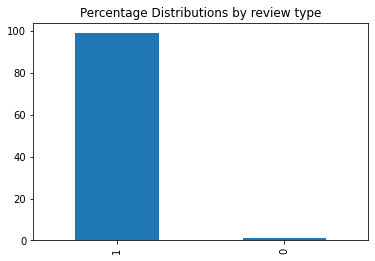

In [189]:
#représentation graphique en pourcentage des happy et not happy 

import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df.true_category.value_counts(normalize=True)*100,2))
round(df.true_category.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [190]:
# Apply cleaning
import re
import string

#conversion en minuscule, suppression des nombres, de la ponctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [191]:
#apply the function
df['cleaned_fullcontent'] = pd.DataFrame(df.full_content.apply(cleaned1))
df.head(10)

,full_content,true_category,cleaned_fullcontent
0,Not for couples. last day of a 6 day holiday. ...,1,not for couples last day of a day holiday aft...
1,Jolleyhols. From start to finish a lovely holi...,1,jolleyhols from start to finish a lovely holid...
2,Spa. The Spa is perfect The massage is very n...,1,spa the spa is perfect the massage is very ni...
3,Fantastic holiday. Highly recommend Creta Mari...,1,fantastic holiday highly recommend creta maris...
4,"Outstanding With excellent service, v nice roo...",1,outstanding with excellent service v nice room...
5,excellent covid free holidays. the hotel looks...,1,excellent covid free holidays the hotel looks ...
6,Amazing holiday. I really enjoyed my time in t...,1,amazing holiday i really enjoyed my time in th...
7,Holiday 2020 . For the fourth year in a row we...,1,holiday for the fourth year in a row we are ...
8,Hammam Spa. Aegeo spas Julia gave an excelle...,1,hammam spa aegeo spas julia gave an excellen...
9,"A place in paradise. Superb hotel, so pictures...",1,a place in paradise superb hotel so picturesqu...


In [192]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)#supprime les apostrophes et autres symboles
    text = re.sub('\n', '', text) #suppression des sauts de lignes
    return text

cleaned2 = lambda x: text_clean_2(x)

In [206]:
# application de la 2e fonction de nettoyage
df['cleaned_fullcontent_new'] = pd.DataFrame(df['cleaned_fullcontent'].apply(cleaned2))

In [235]:
#séparation du dataframe en deux : avec d'un coté le dataframe test et le train (70/30)

from sklearn.model_selection import train_test_split

dataset = df
dftrain, dftest = train_test_split(dataset,  test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))


IV_train : 1953
IV_test  : 217


# SickitLearn : machine learning

In [236]:
from sklearn.feature_extraction.text import CountVectorizer 
#algorithme d'extraction de caractèristique de sickitLearn,module lié au texte pour faire le bag of words (countvectorizer) 
#(on modifie nos mots en vecteur)

In [237]:
count_vect = CountVectorizer() #on instancie le module

In [254]:
count_vect = CountVectorizer(max_features=1000)#On peut ajouter des paramètres
#max_features : garde que les mots les plus fréquents 

In [255]:
# calcul tous les vecteurs et applique le bag of words(qui décrit l'occurrence de mots dans un document)
X_train_counts = count_vect.fit_transform(dftrain.cleaned_fullcontent_new)

# fit fonction qui permet de faire l'apprentissage t de lier le modèle aux données
# transform applique les transformations 
#et il existe une fonction qui fait les deux en meme temps 


In [256]:
X_train_counts #dans mon jeu de données, j'ai 9260 mots
# mes vecteurs, pour chacun des mots fait une taille de 9260
# sparse matrix stocke mieux les objets dans la mémoire dontya beaucoup de 0 


<1953x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 118573 stored elements in Compressed Sparse Row format>

In [257]:
X_train_counts.toarray()#affichage de ma matrice 

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [258]:
X_train_counts.toarray().shape
#chaque phrases a été transformée en vecteurs

(1953, 1000)

# Définition du modèle 

In [259]:
from sklearn.linear_model import LogisticRegression #modèle via la régréssion logistique

# pour tous les modèles de régression binomiale, 
#il s'agit de modéliser au mieux un modèle mathématique simple 
#à des observations réelles nombreuses.
#Cela associe mes vecteurs à ma colonne binomiale à savoir "true_category"

In [260]:
classifieur = LogisticRegression() 

## Apprentissage du modèle

In [261]:
classifieur.fit(X_train_counts,dftrain.true_category)

LogisticRegression()

# Prédiction sur le jeu de test

In [266]:
X_test_counts = count_vect.transform(dftest.cleaned_fullcontent_new)
#Transform parce que mon jeu de données à déjà appris

In [267]:
predictions = classifieur.predict(X_test_counts)

In [269]:
predictions.shape

(217,)

In [270]:
#comparer la prédiction avec la réalité
from sklearn.metrics import accuracy_score

In [271]:
accuracy_score(predictions,dftest.true_category)

0.9861751152073732

In [23]:
predictions

NameError: name 'predictions' is not defined